In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

path = os.getcwd()
print('working dir: ' + path)
#/opt/dssg-hot/notebooks/shirley

working dir: /opt/dssg-hot/notebooks/shirley


# Join ACS info to cbg shapefile by fips

In [2]:
# - Load census block groups
cbgs = gpd.read_file('/opt/dssg-hot/data/shapefiles/block_groups_WA/bg10.shp')
cbgs = cbgs[['GEOID10','geometry']]
cbgs.rename(columns={'GEOID10':'fips'}, inplace=True)
cbgs['fips'] = pd.to_numeric(cbgs['fips'])
cbgs['geometry'] = cbgs['geometry'].to_crs(epsg=4326)
#cbgs.dtypes
#cbgs.head()

In [3]:
# - Load ACS 2016 info
acs = pd.read_csv('/opt/dssg-hot/data/acs/block_group_census_estimates_wide_original_bins_all_WA.csv',
                  usecols=['fips_code', 'households', 'mean_inc', 'med_age', 'med_inc', 'pc_income',
                              'population', 'race_nonhisp_asian', 'race_nonhisp_white', 'trans_carpool',
                              'trans_drivealone', 'trans_transit'])
acs.rename(columns={'fips_code':'fips'}, inplace=True)
cols = acs.columns.drop(['fips','population'])
#acs.dtypes
#acs.head()

In [4]:
cbgs_acs = cbgs.merge(acs, on='fips')

# Load in shapefiles for drawing maps

#### Load in toll points shapefile

In [5]:
tollptsnb = gpd.read_file('/opt/dssg-hot/data/shapefiles/toll_pts_405/northbound_405_toll_pts.shp')
#print(tollptsnb.crs)
#print(tollptsnb.head())

majtpsnb = tollptsnb[(tollptsnb['Name']=='NB Entry 1 (entry plaza = NB1 aka 3)')
                |(tollptsnb['Name']=='NB Exit 7 (exit plaza = NB10 aka 12)')]
#majtpsnb.plot()

In [6]:
tollptssb = gpd.read_file('/opt/dssg-hot/data/shapefiles/toll_pts_405/southbound_405_toll_pts.shp')
#print(tollptssb.crs)
#print(tollptssb.head())

majtpssb = tollptssb[(tollptssb['Name']=='SB Entry 1 (entry plaza = SB1 aka 13)')
                |(tollptssb['Name']=='SB Exit 7 (exit plaza = SB10 aka 23)')]
#majtpssb.plot()

#### Load in city points shapefile

In [7]:
citypts = gpd.read_file('/opt/dssg-hot/data/shapefiles/city_points/city_points.shp')
#print(citypts.crs)
citypts['geometry'] = citypts['geometry'].to_crs(epsg=4326)
#print(citypts.head())

#majcps = citypts[(citypts['MajorCity']=='yes')]
majcps = citypts[(citypts['NAME']=='Seattle')|(citypts['NAME']=='Bellevue')
                 |(citypts['NAME']=='Lynnwood')|(citypts['NAME']=='Woodinville')
                 |(citypts['NAME']=='Bothell')|(citypts['NAME']=='Shoreline')
                 |(citypts['NAME']=='Edmonds')|(citypts['NAME']=='Redmond')
                 |(citypts['NAME']=='Kirkland')|(citypts['NAME']=='Renton')
                 |(citypts['NAME']=='Kent')|(citypts['NAME']=='Issquah')
                 |(citypts['NAME']=='Everett')|(citypts['NAME']=='SeaTac')]
# ax = majcps.plot()
# for x, y, label in zip(majcps.geometry.x, majcps.geometry.y, majcps.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

#### Load in roads shapefile

In [8]:
rds500k = gpd.read_file('/opt/dssg-hot/data/shapefiles/roads500k/sr500k_20181231.shp')
#print(rds500k.crs)
rds500k['geometry'] = rds500k['geometry'].to_crs(epsg=4326)
#print(rds500k.head())

majrds = rds500k[(rds500k['StateRoute']=='405')|(rds500k['StateRoute']=='005')
                |(rds500k['StateRoute']=='522')|(rds500k['StateRoute']=='520')
                |(rds500k['StateRoute']=='527')|(rds500k['StateRoute']=='90')]
#majrds.plot()

#### Load in water shapefiles

In [9]:
water = gpd.read_file('/opt/dssg-hot/data/shapefiles/water/water_bodies.shp')
#print(water.crs)
#print(water.head())

majlks = water[(water['NAME']=='Green Lake')|(water['NAME']=='Lake Union')
                |(water['NAME']=='Lake Meridian')|(water['NAME']=='Salmon Bay')
                |(water['NAME']=='Lake Washington')|(water['NAME']=='Lake Sammamish')
                |(water['NAME']=='Lake Youngs')|(water['NAME']=='Lake Stevens')]
#majlks.plot()

In [15]:
otherwater = gpd.read_file('/opt/dssg-hot/data/shapefiles/more_water/wtrbdy_area.shp')
pugetsound = otherwater[otherwater['NAME']=='Puget Sound']
#print(otherwater.crs)
#print(otherwater.head())

# Basic maps

In [16]:
def plot_on_bgs_6vars_diff_cbars(cbgs_dfnow, colnamesnow, titlesnow, pdfnamenow):
    fig,axes = plt.subplots(2, 3, figsize = (24,20))

    icol = 0
    for yax in range(0,2):
        for xax in range(0,3):            
            axes[yax][xax].set_ylim([47.25, 48.1])
            axes[yax][xax].set_xlim([-122.45, -121.9])
            axes[yax][xax].set_title(titlesnow[icol]) 

            vmin = cbgs_dfnow[colnamesnow[icol]].min()
            vmax = cbgs_dfnow[colnamesnow[icol]].max()
            
            cbgs_dfnow.plot(column = colnamesnow[icol], ax = axes[yax][xax], legend=True, vmin=vmin, vmax=vmax)

            majlks.plot(ax=axes[yax][xax], color='paleturquoise', linewidth=3)
            pugetsound.plot(ax=axes[yax][xax], color='paleturquoise', linewidth=3)
            majrds.plot(ax=axes[yax][xax], color='gray', linewidth=3)
            majcps.plot(ax=axes[yax][xax], color='white')
            for x, y, label in zip(majcps.geometry.x, majcps.geometry.y, majcps.NAME):
                axes[yax][xax].annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', color='white')
                majtpsnb.plot(ax=axes[yax][xax], color='magenta', markersize=100)
            
            if icol < (len(colnamesnow)-1): # allows for using this fxn for <6 groups, just replots the last group
                icol = icol+1

    fig.savefig('/opt/dssg-hot/notebooks/shirley/figs/' + pdfnamenow + '.pdf', bbox_inches='tight', pad_inches = 0)

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:925: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


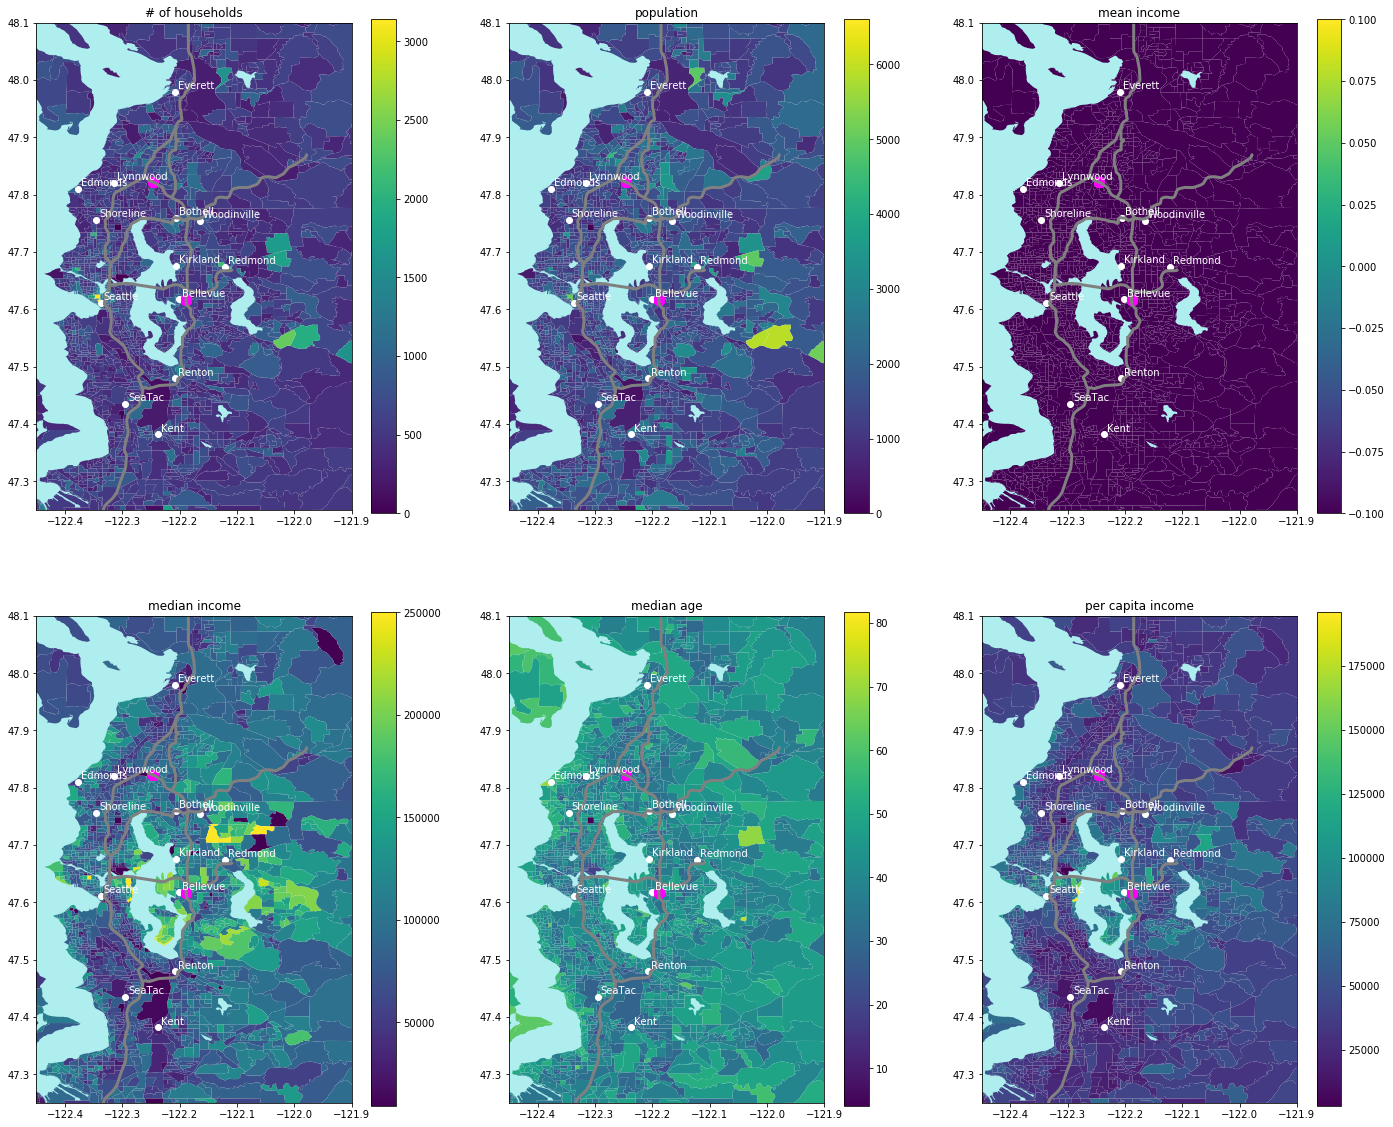

In [19]:
colnamesnow = ['households','population','mean_inc','med_inc','med_age','pc_income']
titlesnow = ['# of households','population','mean income','median income','median age','per capita income'];
pdfnamenow = 'fips_acs_vars_set_1'
plot_on_bgs_6vars_diff_cbars(cbgs_acs, colnamesnow, titlesnow, pdfnamenow)

/opt/conda/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


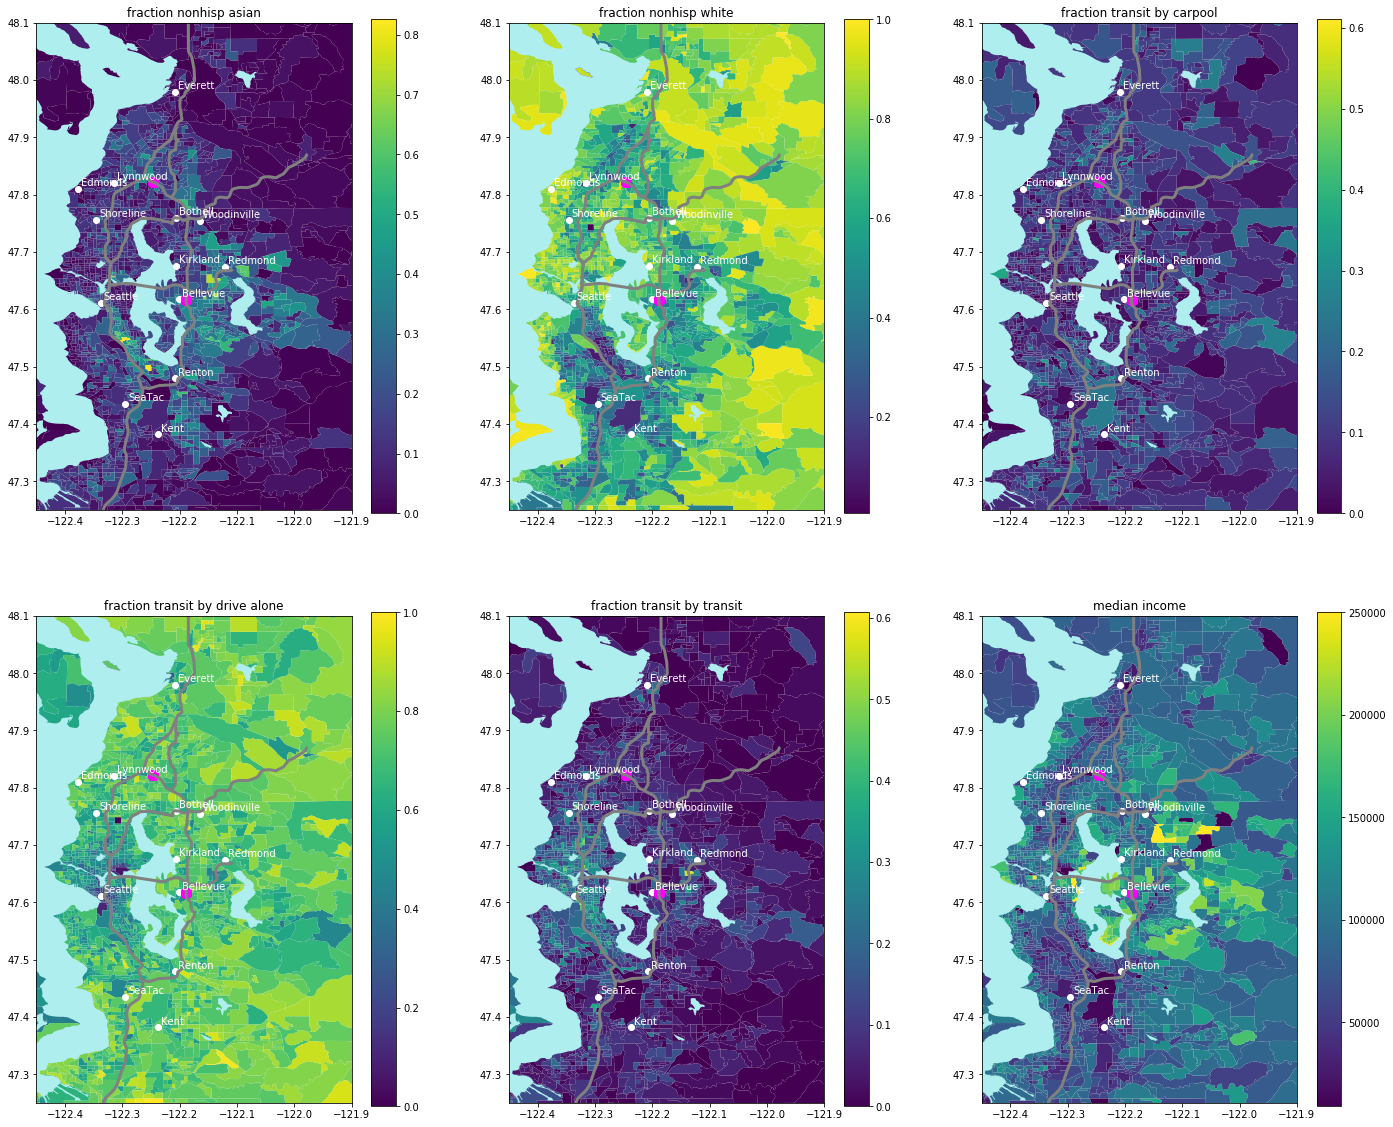

In [20]:
colnamesnow = ['race_nonhisp_asian','race_nonhisp_white','trans_carpool','trans_drivealone','trans_transit','med_inc']
titlesnow = ['fraction nonhisp asian','fraction nonhisp white','fraction transit by carpool','fraction transit by drive alone',
             'fraction transit by transit','median income'];
pdfnamenow = 'fips_acs_vars_set_2'
plot_on_bgs_6vars_diff_cbars(cbgs_acs, colnamesnow, titlesnow, pdfnamenow)